# Changelog

All notable changes to this project will be documented in this file.

### [0.0.6] - 2023-11-19
DATASET:
- dataset_walls_corrected_2.zip

MODEL:
- version 06

CHANGES:
- updated dataset
  - manual review
  - fixed extended walls
- minor changes in data genaerator
- random order in learning inecies

### [0.0.7] - 2023-11-22
DATASET:
- dataset_fine_1.zip
  - ~20 000 elements in dataset
  - simple examples only (ortho, communication space next to entrance, all room
  categories included)

MODEL:
- version 07

CHANGES:
- fixed problem of inconsitent input to output augmentation in generator

### [0.0.8] - 2023-11-28
DATASET:
- dataset_fine_1.zip

MODEL:
- version 08

CHANGES:
-

### [0.0.9] - 2023-12-05

DATASET:
- dataset_fine_1.zip

MODEL:
- version 09

CHANGES:
- size of discriminator
  - add several danse layers to make model deeper
- size of generator to downsize model
- image input and output downsize

### [0.0.10] - 2023-12-17
DATASET:
- dataset_fine_1.zip

MODEL:
- version 10

CHANGES:
-

### [0.0.14] - 2023-12-30
DATASET:
- dataset_fine_1.zip

MODEL:
- version 14

CHANGES:
-

### [0.0.15] - 2023-12-30
DATASET:
- dataset_fine_1.zip

MODEL:
- version 15

CHANGES:
-

# Contributions

Solution is based on:
- Cheong, S.Y., Hands-On Image Generation with TensorFlow: A practical guide to generating images and videos using deep learning, Packt Publishing, 2020
- Phillip Isola, Jun-Yan Zhu, Tinghui Zhou, Alexei A. Efros, Image-to-Image Translation with Conditional Adversarial Networks, CoRR, 2016
- pix2pix: Image-to-image translation with a conditional GAN, URL: https://www.tensorflow.org/tutorials/generative/pix2pix

In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# ! cp /content/gdrive/MyDrive/inz_ml_dataset/dataset_fine_1.zip  /content/dataset_fine_1.zip
# !unzip "/content/dataset_fine_1.zip"

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
  inflating: dataset_fine_1/output/40054.png  
  inflating: dataset_fine_1/output/40057.png  
  inflating: dataset_fine_1/output/4006.png  
  inflating: dataset_fine_1/output/40060.png  
  inflating: dataset_fine_1/output/40062.png  
  inflating: dataset_fine_1/output/40063.png  
  inflating: dataset_fine_1/output/40064.png  
  inflating: dataset_fine_1/output/40065.png  
  inflating: dataset_fine_1/output/40068.png  
  inflating: dataset_fine_1/output/40069.png  
  inflating: dataset_fine_1/output/40070.png  
  inflating: dataset_fine_1/output/40072.png  
  inflating: dataset_fine_1/output/40075.png  
  inflating: dataset_fine_1/output/4008.png  
  inflating: dataset_fine_1/output/40080.png  
  inflating: dataset_fine_1/output/40081.png  
  inflating: dataset_fine_1/output/40082.png  
  inflating: dataset_fine_1/output/40084.png  
  inflating: dataset_fine_1/output/40086.png  
  inflating: dataset_fine_1/output/40088.png

In [2]:
import tensorflow as tf
import os
import pathlib
import time
import datetime
from matplotlib import pyplot as plt
from IPython import display
import albumentations as A
import random
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow import keras
from PIL import Image

In [3]:
# GLOBAL CONSTS
DATASET_DIR_NAME = 'dataset_fine_1'
MODEL_VER = '15'

image_shape = (256, 256, 3)
IMG_WIDTH = image_shape[1]
IMG_HEIGHT = image_shape[0]

In [4]:
# The batch size of 1 produced better results for the U-Net in the original pix2pix experiment
BATCH_SIZE = 1

In [5]:
dir = os.path.join(os.path.curdir , DATASET_DIR_NAME)
dir_in = os.path.join(dir , "input")
dir_out = os.path.join(dir , "output")

IMG_SIZE = IMG_WIDTH
img_size = (IMG_WIDTH, IMG_HEIGHT)
batch_size = BATCH_SIZE

input_img_paths = list()
output_img_paths = list()

for fname in os.listdir(dir_out):
  output_img_paths.append(os.path.join(dir_out, fname))
  input_img_paths.append(os.path.join(dir_in, fname))

output_img_paths = sorted(output_img_paths)
input_img_paths = sorted(input_img_paths)

print("Number of samples:", len(input_img_paths))

for input_path, target_path in zip(input_img_paths[-10:], output_img_paths[-10:]):
    print(input_path, "|", target_path)

Number of samples: 19834
./dataset_fine_1/input/9988.png | ./dataset_fine_1/output/9988.png
./dataset_fine_1/input/9989.png | ./dataset_fine_1/output/9989.png
./dataset_fine_1/input/999.png | ./dataset_fine_1/output/999.png
./dataset_fine_1/input/9991.png | ./dataset_fine_1/output/9991.png
./dataset_fine_1/input/9992.png | ./dataset_fine_1/output/9992.png
./dataset_fine_1/input/9993.png | ./dataset_fine_1/output/9993.png
./dataset_fine_1/input/9994.png | ./dataset_fine_1/output/9994.png
./dataset_fine_1/input/9995.png | ./dataset_fine_1/output/9995.png
./dataset_fine_1/input/9996.png | ./dataset_fine_1/output/9996.png
./dataset_fine_1/input/9999.png | ./dataset_fine_1/output/9999.png


In [6]:
augmentation = A.Compose([
        A.Resize(always_apply=True, p=1.0, height=IMG_HEIGHT, width=IMG_WIDTH, interpolation=3),
        A.RandomRotate90(always_apply=False, p = 0.75)
    ])

# multi_layer_func


In [7]:
colors_out = [
    (0, 0, 0),
    (0, 255, 0),
    (255, 0, 255),
    (0, 255, 128),
    (0, 128, 255),
    (255, 255, 0),
    (128, 128, 128),
    (0, 0, 255),
    (255, 0, 0),
    (0, 255, 255),
    (255, 255, 255)
]

colors_in = [
    (0, 0, 0),
    (0, 0, 255),
    (255, 0, 0),
    (128, 128, 128),
    (255, 255, 255)
]

# returns 0 / 1 array
def rgb_to_multi_class(img_array, img_size, colors_list):
  # out = np.zeros(img_size + (len(colors_list),), dtype="float32")
  # for in_y in range(img_size[0]):
  #   for in_x in range(img_size[1]):

  #     temp_pixel = (int(img_array[in_y, in_x, 0]), int(img_array[in_y, in_x, 1]), int(img_array[in_y, in_x, 2]))
  #     layer = colors_list.index(temp_pixel)

  #     out[in_y, in_x, layer] = 1.0
  # return out
  return (img_array[:] / 127.5) - 1

# returns 0  .. 1
def multi_class_to_rgb(img_array, img_size, colors_list):
  # out = np.zeros(img_size + (3,), dtype="float32")
  # layer = img_array.argmax(axis=-1).reshape(img_size)

  # for in_y in range(img_size[0]):
  #   for in_x in range(img_size[1]):

  #     pixel_colors = colors_list[layer[in_y, in_x]]

  #     for c_ix in range(3):
  #       out[in_y, in_x, c_ix] = pixel_colors[c_ix] / 255.0
  # return out
  return (img_array[:] + 1) / 2.0


In [8]:
# def resize(matrix):

#     print(matrix.shape)
#     image = Image.fromarray(matrix)
#     new_image = image.resize(img_size)
#     new_matrix = np.array(new_image)
#     return new_matrix

# to 0.0 .. 1.0 range
def denorm(matrix, colors_list):

    denormalized_matrix = np.copy( multi_class_to_rgb(matrix, img_size, colors_list) )

    # denormalized_matrix += 1.0
    # denormalized_matrix *= 0.5
    return denormalized_matrix

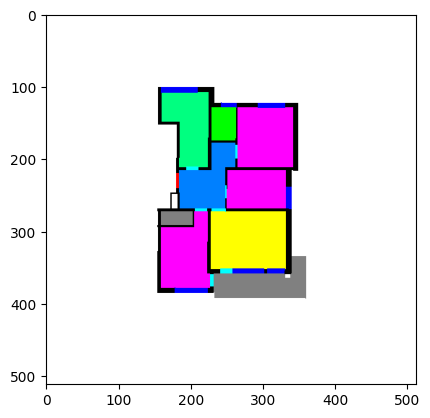

In [9]:
img = tf.keras.utils.load_img(output_img_paths[0])
img = tf.keras.utils.img_to_array(img)

multi_class = rgb_to_multi_class(img, img_size, colors_out)
img = multi_class_to_rgb(multi_class, img_size, colors_out)

plt.figure()
plt.imshow(img)

In [10]:
class DataGenerator(keras.utils.Sequence):
    """Helper to iterate over the data (as Numpy arrays)."""

    def __init__(self, batch_size, img_size, input_img_paths, target_img_paths, aug_composition, colors_out_list, colors_in_list):
        self.batch_size = batch_size
        self.img_size = img_size
        self.input_img_paths = input_img_paths[:]
        self.target_img_paths = target_img_paths[:]
        self.aug_composition = aug_composition
        self.seed = int(time.time())
        self.epoch = 0
        self.colors_out_list = colors_out_list
        self.colors_in_list = colors_in_list

        random_val = int(time.time())

        random.Random(self.seed).shuffle(self.input_img_paths)
        random.Random(self.seed).shuffle(self.target_img_paths)

    def __len__(self):
        return len(self.target_img_paths) // self.batch_size

    def __getitem__(self, idx):
        """Returns tuple (input, target) correspond to batch #idx."""
        i = idx * self.batch_size
        batch_input_img_paths = self.input_img_paths[i : i + self.batch_size]
        batch_target_img_paths = self.target_img_paths[i : i + self.batch_size]
        # x = np.zeros((self.batch_size,) + self.img_size + (len(self.colors_in_list),), dtype="float32")
        # y = np.zeros((self.batch_size,) + self.img_size + (len(self.colors_out_list),), dtype="float32")
        x = np.zeros((self.batch_size,) + self.img_size + (3,), dtype="float32")
        y = np.zeros((self.batch_size,) + self.img_size + (3,), dtype="float32")

        for j, path in enumerate(zip(batch_input_img_paths, batch_target_img_paths)):
            img_in = tf.keras.utils.load_img(path[0])
            img_target = tf.keras.utils.load_img(path[1])

            img_in = tf.keras.utils.img_to_array(img_in)
            img_target = tf.keras.utils.img_to_array(img_target)

            random.seed(self.seed + self.epoch + j)
            augmented = self.aug_composition(image=img_in, mask=img_target)

            x[j] = rgb_to_multi_class(augmented['image'], self.img_size, self.colors_in_list)
            # x[j] /= 127.5
            # x[j] -= 1.0

            y[j] = rgb_to_multi_class(augmented['mask'], self.img_size, self.colors_out_list)
            # y[j] /= 127.5
            # y[j] -= 1.0
        return x, y

In [11]:
test_samples = 1000

val_input_img_paths = input_img_paths[-test_samples:]
val_target_img_paths = output_img_paths[-test_samples:]
test_gen = DataGenerator(batch_size, img_size, val_input_img_paths, val_target_img_paths, augmentation, colors_out, colors_in)

parts_num = 2
part_size = int(math.floor((len(input_img_paths) - test_samples) / parts_num))

def get_generators():
  generators_list = list()

  for i in range(parts_num):
    train_input_img_paths = input_img_paths[i * part_size : (i+1) * part_size]
    train_target_img_paths = output_img_paths[i * part_size : (i+1) * part_size]

    # Instantiate data Sequences for each split
    train_gen = DataGenerator(batch_size, img_size, train_input_img_paths, train_target_img_paths, augmentation, colors_out, colors_in)
    generators_list.append(train_gen)
  return generators_list

In [12]:
example_data = test_gen.__getitem__(0)

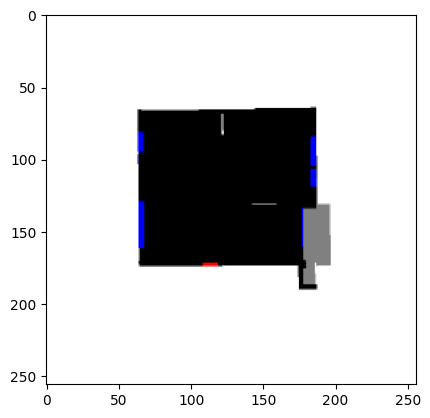

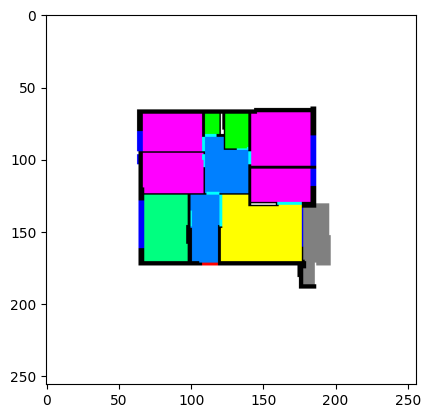

In [13]:
# Casting to int for matplotlib to display the images
plt.figure()
plt.imshow(denorm(example_data[0][0], colors_in))
plt.figure()
plt.imshow(denorm(example_data[1][0], colors_out))

In [14]:
OUTPUT_CHANNELS = 3
# OUTPUT_CHANNELS = len(colors_out)

In [15]:
def downsample(filters, size, apply_batchnorm=True):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
      tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                             kernel_initializer=initializer, use_bias=False))

  if apply_batchnorm:
    result.add(tf.keras.layers.BatchNormalization())

  result.add(tf.keras.layers.LeakyReLU())

  return result

In [16]:
down_model = downsample(3, 4)
down_result = down_model(tf.expand_dims(example_data[0][0], 0))
print (down_result.shape)

(1, 128, 128, 3)


In [17]:
def upsample(filters, size, apply_dropout=False):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
    tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                    padding='same',
                                    kernel_initializer=initializer,
                                    use_bias=False))

  result.add(tf.keras.layers.BatchNormalization())

  if apply_dropout:
      result.add(tf.keras.layers.Dropout(0.5))

  result.add(tf.keras.layers.ReLU())

  return result

In [18]:
up_model = upsample(3, 4)
up_result = up_model(down_result)
print (up_result.shape)

(1, 256, 256, 3)


In [19]:
def Generator():
  inputs = tf.keras.layers.Input(shape=[IMG_SIZE, IMG_SIZE, 3])
  # inputs = tf.keras.layers.Input(shape=[IMG_SIZE, IMG_SIZE, len(colors_in)])


  down_stack = [
    downsample(32, 4, apply_batchnorm=False),  # (batch_size, 128, 128, 64)
    downsample(64, 4),  # (batch_size, 64, 64, 128)
    downsample(128, 4),  # (batch_size, 32, 32, 256)
    downsample(256, 4),  # (batch_size, 16, 16, 512)
    downsample(512, 4),  # (batch_size, 8, 8, 512)
    downsample(1024, 4),
    downsample(1024, 4)
  ]

  up_stack = [
    upsample(1024, 4, apply_dropout=True),
    upsample(1024, 4, apply_dropout=True),
    upsample(512, 4),
    upsample(256, 4),
    upsample(128, 4),
    upsample(64, 4),
    upsample(32, 4)
  ]

  initializer = tf.random_normal_initializer(0., 0.02)
  last = tf.keras.layers.Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                         strides=2,
                                         padding='same',
                                         kernel_initializer=initializer,
                                         activation='tanh')  # (batch_size, 256, 256, 3)  # was activation='tanh' # softmax

  x = inputs

  # Downsampling through the model
  skips = []
  for down in down_stack:
    x = down(x)
    skips.append(x)

  skips = reversed(skips[:-1])
  # skips = skips[:-1]
  # skips.reverse()

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    x = tf.keras.layers.Concatenate()([x, skip])

  # for up in up_stack:
  #   x = up(x)
  #   temp_list = skips[:]
  #   temp_list.append(x)
  #   x = tf.keras.layers.Concatenate()(temp_list)

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)

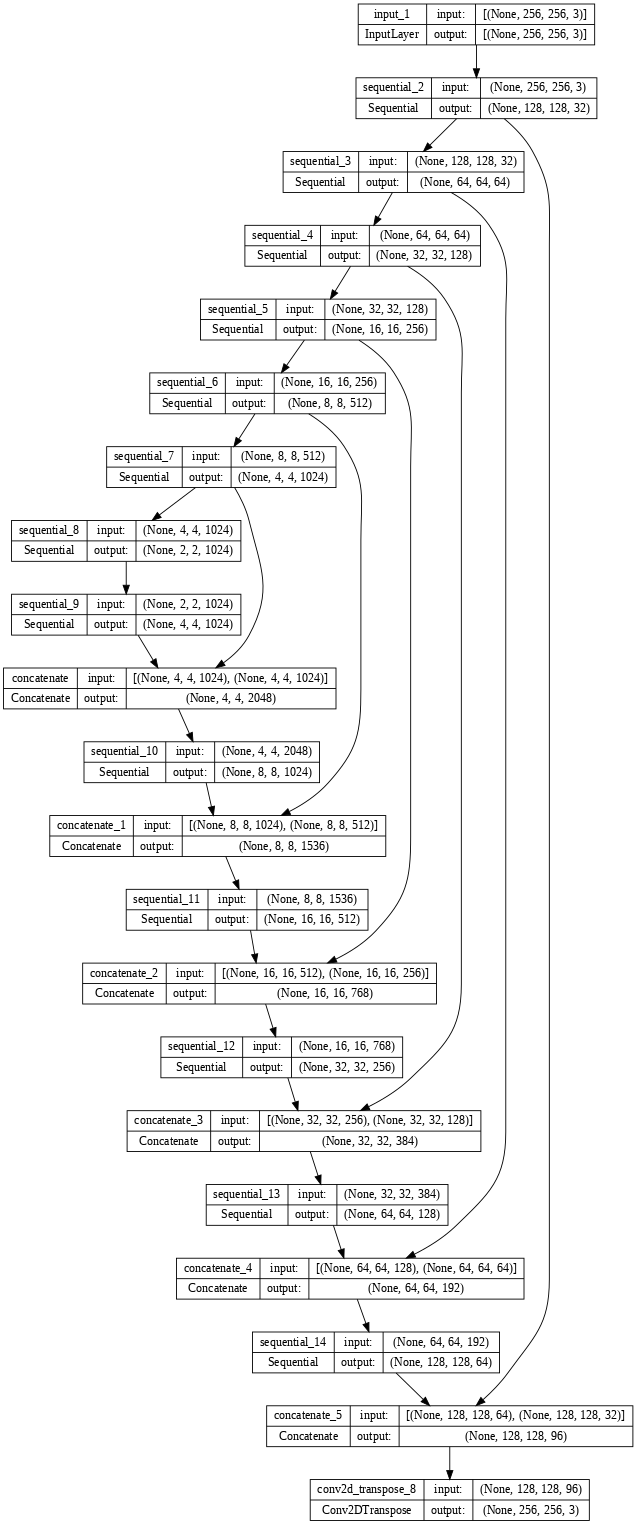

In [20]:
generator = Generator()
tf.keras.utils.plot_model(generator, show_shapes=True, dpi=64)

In [21]:
generator.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 sequential_2 (Sequential)   (None, 128, 128, 32)         1536      ['input_1[0][0]']             
                                                                                                  
 sequential_3 (Sequential)   (None, 64, 64, 64)           33024     ['sequential_2[0][0]']        
                                                                                                  
 sequential_4 (Sequential)   (None, 32, 32, 128)          131584    ['sequential_3[0][0]']        
                                                                                              

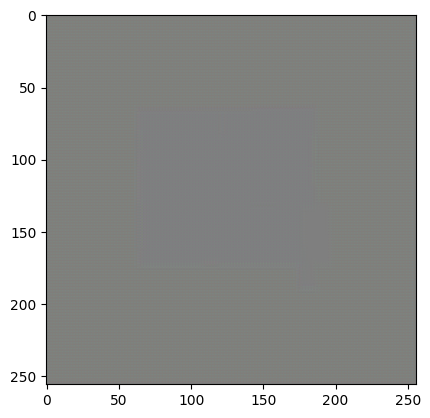

In [22]:
gen_output = generator(example_data[0], training=False)
plt.imshow(denorm(gen_output[0, ...].numpy(), colors_out))

In [23]:
LAMBDA = 100

In [24]:
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [25]:
def generator_loss(disc_generated_output, gen_output, target):
  gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

  # Mean absolute error
  l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

  total_gen_loss = gan_loss + (LAMBDA * l1_loss)

  return total_gen_loss, gan_loss, l1_loss

In [26]:
class NoiseLayer(tf.keras.layers.Layer):
    def __init__(self, noise_std):
        super(NoiseLayer, self).__init__()
        self.noise_std = noise_std

    def call(self, inputs, training=None):
        if training:
            noise = tf.random.normal(tf.shape(inputs), stddev=self.noise_std)
            return inputs + noise
        return inputs

In [27]:
def Discriminator():
  initializer = tf.random_normal_initializer(0., 0.02)

  inp = tf.keras.layers.Input(shape=[IMG_SIZE, IMG_SIZE, 3], name='input_image')
  tar = tf.keras.layers.Input(shape=[IMG_SIZE, IMG_SIZE, 3], name='target_image')

  x = tf.keras.layers.concatenate([inp, tar])
  x = tf.keras.layers.BatchNormalization()(x)

  x = tf.keras.layers.Conv2D(64, 4, strides=2, kernel_initializer=initializer, use_bias=False)(x)
  x = tf.keras.layers.LeakyReLU()(x)

  x = tf.keras.layers.Conv2D(128, 4, strides=2, kernel_initializer=initializer, use_bias=False)(x)
  x = tf.keras.layers.LeakyReLU()(x)

  x = tf.keras.layers.Conv2D(256, 4, strides=2, kernel_initializer=initializer, use_bias=False)(x)
  x = tf.keras.layers.LeakyReLU()(x)

  x = tf.keras.layers.Conv2D(512, 4, strides=2, kernel_initializer=initializer, use_bias=False)(x)
  x = tf.keras.layers.LeakyReLU()(x)

  x = tf.keras.layers.Conv2D(1024, 4, strides=2, kernel_initializer=initializer, use_bias=False)(x)
  x = tf.keras.layers.LeakyReLU()(x)

  conv = tf.keras.layers.Conv2D(1024, 3, strides=1, kernel_initializer=initializer, use_bias=False)(x)
  drp = tf.keras.layers.Dropout(0.5)(conv)
  batchnorm1 = tf.keras.layers.BatchNormalization()(drp)
  leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)
  # zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu)

  last = tf.keras.layers.Conv2D(1, 4, strides=1, kernel_initializer=initializer)(leaky_relu)

  return tf.keras.Model(inputs=[inp, tar], outputs=last)

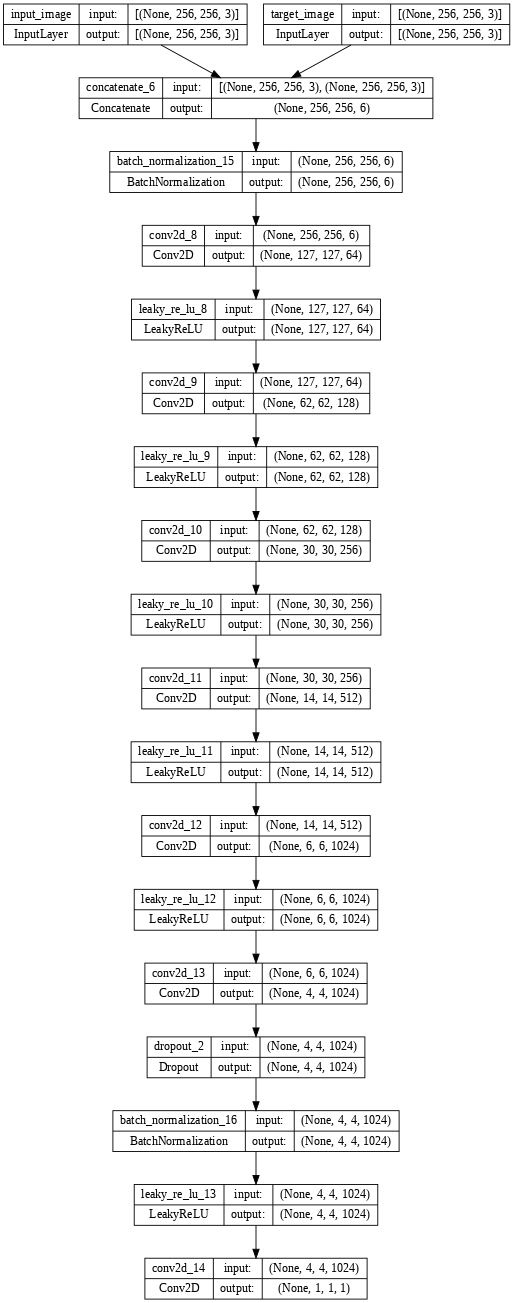

In [28]:
discriminator = Discriminator()
tf.keras.utils.plot_model(discriminator, show_shapes=True, dpi=64)

In [29]:
discriminator.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_image (InputLayer)    [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 target_image (InputLayer)   [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 concatenate_6 (Concatenate  (None, 256, 256, 6)          0         ['input_image[0][0]',         
 )                                                                   'target_image[0][0]']        
                                                                                                  
 batch_normalization_15 (Ba  (None, 256, 256, 6)          24        ['concatenate_6[0][0]'] 

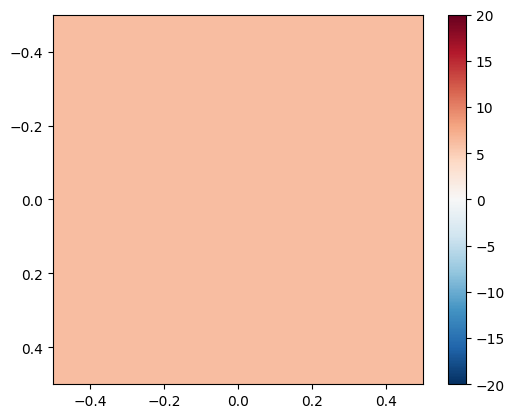

In [30]:
disc_out = discriminator([example_data[0] * 255 , example_data[1] * 255 ], training=False)
plt.imshow(disc_out[0, ..., -1], vmin=-20, vmax=20, cmap='RdBu_r')
plt.colorbar()


In [31]:
def discriminator_loss(disc_real_output, disc_generated_output):
  real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)

  generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

  total_disc_loss = real_loss + generated_loss

  return total_disc_loss

In [32]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4, beta_1=0.7)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4, beta_1=0.7)

In [33]:
checkpoint_dir = '/content/gdrive/MyDrive/inz_ml_checkpoints/model_v' + MODEL_VER
# checkpoint_dir = os.path.join(os.path.curdir , "checkpoints", 'model_v4')
pathlib.Path(checkpoint_dir).mkdir(parents=True, exist_ok=True)

checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [34]:
def generate_images(model, test_input, tar):
  prediction = model(test_input, training=True)
  plt.figure(figsize=(15, 15))

  display_list = [test_input[0], tar[0], prediction[0]]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']

  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(title[i])
    # Getting the pixel values in the [0, 1] range to plot.
    if i == 0:
      plt.imshow(denorm(display_list[i], colors_in))
    elif i == 1:
      plt.imshow(denorm(display_list[i], colors_out))
    else:
      plt.imshow(denorm(display_list[i].numpy(), colors_out))
    plt.axis('off')
  plt.show()

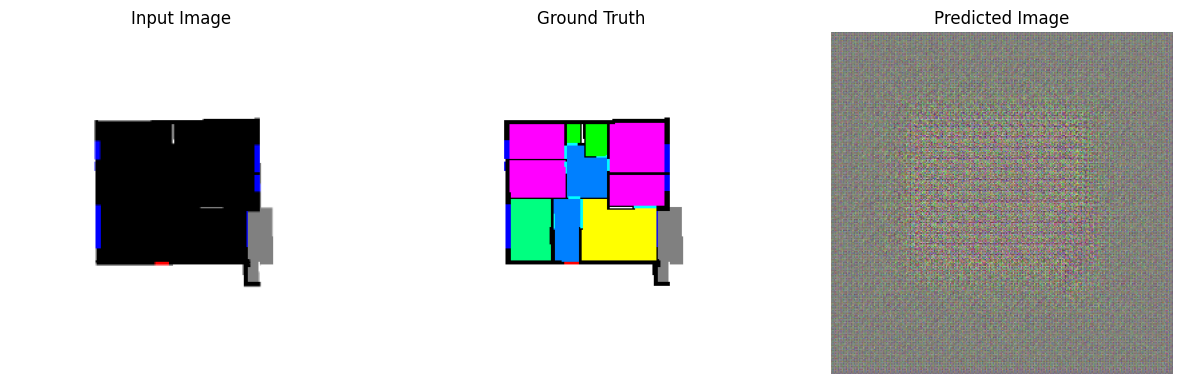

In [35]:
generate_images(generator, example_data[0], example_data[1])

In [36]:

def train_step(input_image, target, step):
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    gen_output = generator(input_image, training=True)

    disc_real_output = discriminator([input_image, target], training=True)
    disc_generated_output = discriminator([input_image, gen_output], training=True)

    gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(disc_generated_output, gen_output, target)
    disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

  generator_gradients = gen_tape.gradient(gen_total_loss,
                                          generator.trainable_variables)
  discriminator_gradients = disc_tape.gradient(disc_loss,
                                               discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(generator_gradients,
                                          generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(discriminator_gradients,
                                              discriminator.trainable_variables))

  return gen_total_loss, gen_gan_loss, gen_l1_loss, disc_loss


In [37]:
def fit(iter_train, test_ds, steps, checkpoint_every, display_every):
  # example_input, example_target = next(iter(test_ds.take(1)))
  start = time.time()
  loss = [0, 0, 0, 0]

  # for step, (input_image, target) in train_ds.repeat().take(steps).enumerate():
  for step in range(steps):

    input_image, target = next(iter_train)

    if (step) % display_every == 0:
      display.clear_output(wait=True)

      random.seed(a=None) # time as seed
      example_input, example_target = test_ds.__getitem__(random.randrange(0, test_samples - 1))

      if step != 0:
        print(f'Time taken for {display_every} steps: {time.time()-start:.2f} sec\n')

      start = time.time()

      generate_images(generator, example_input, example_target)
      print(f"Step: {step}")
      print(f"Loss: \ndisc_loss: {loss[3]}, \ngen_gan_loss: {loss[1]}, \ngen_l1_loss: {loss[2]}, \ngen_total_loss: {loss[0]}")

    loss = train_step(input_image, target, step)

    # Training step
    if (step+1) % 10 == 0:
      print('.', end='', flush=True)

    # Save (checkpoint) the model every 5k steps
    if (step + 1) % checkpoint_every == 0:
      checkpoint.save(file_prefix=checkpoint_prefix)
      print("Checkpoint saved...")

In [38]:
# Restoring the latest checkpoint in checkpoint_dir
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

### Fit model


In [39]:
gen_list =  get_generators()
gen_list_len = len(gen_list)

iter_order = [*range(gen_list_len)]
random.Random(time.time()).shuffle(iter_order)

Time taken for 50 steps: 15.86 sec



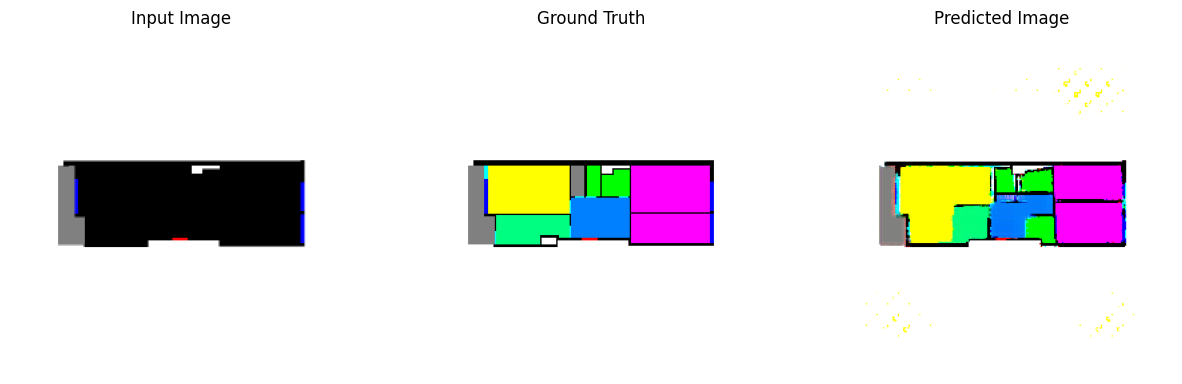

Step: 500
Loss: 
disc_loss: 0.0009718927321955562, 
gen_gan_loss: 6.988134384155273, 
gen_l1_loss: 0.06207391619682312, 
gen_total_loss: 13.195526123046875
....

KeyboardInterrupt: ignored

In [40]:
for _ in range(99):
  gen_list =  get_generators()
  gen_list_len = len(gen_list)

  for i in iter_order:

      it_train = iter(gen_list[i])
      # it_test = iter(test_gen)

      fit(it_train, test_gen, part_size, part_size, 50)

In [ ]:
checkpoint.save(file_prefix=checkpoint_prefix)

'/content/gdrive/MyDrive/inz_ml_checkpoints/model_v8/ckpt-28'

In [ ]:
!ls {checkpoint_dir}

In [ ]:
# checkpoint.restore( checkpoint_dir + "/ckpt-23")

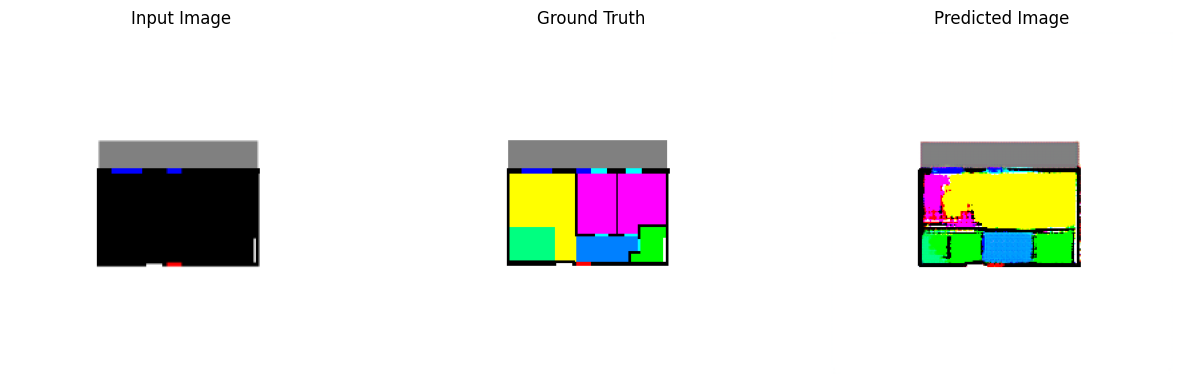

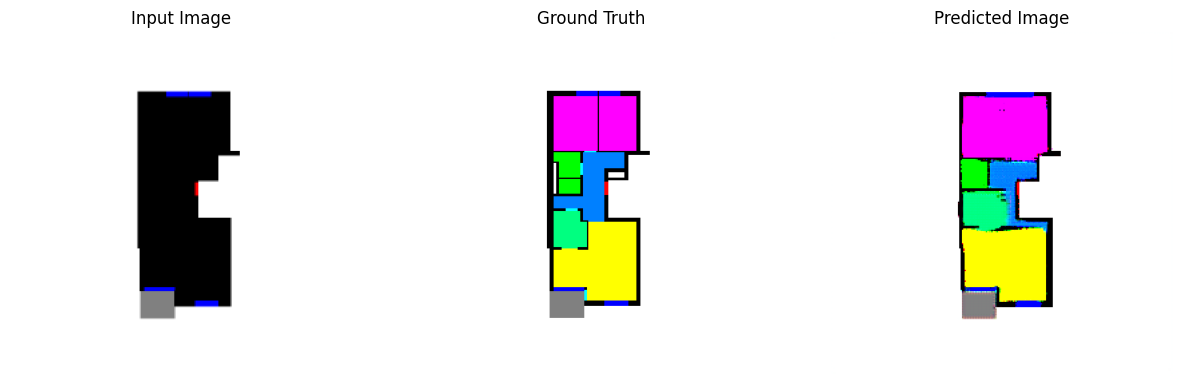

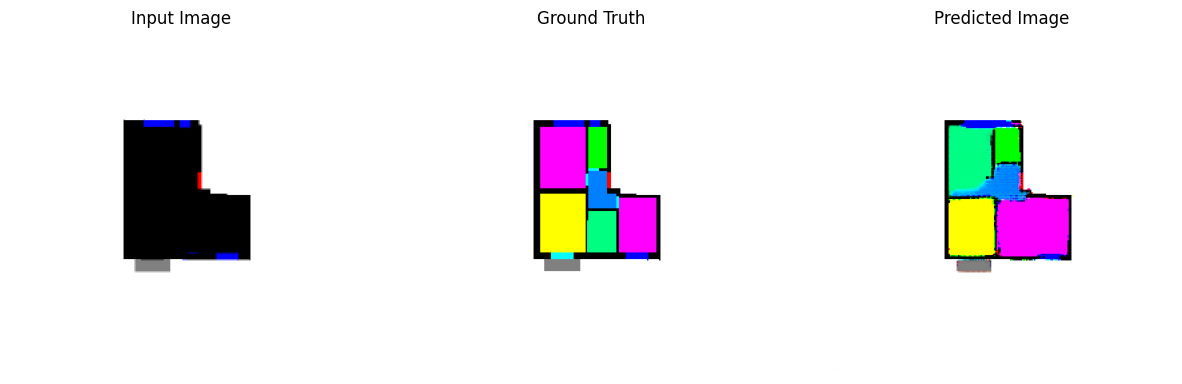

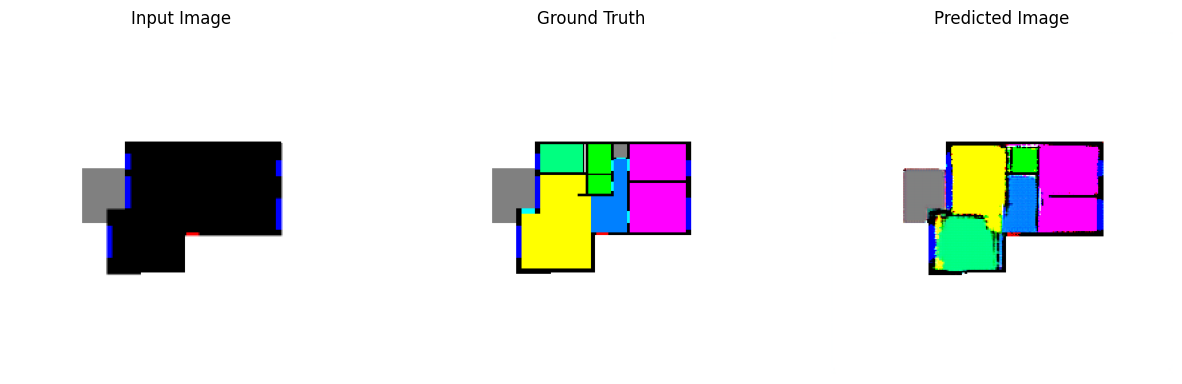

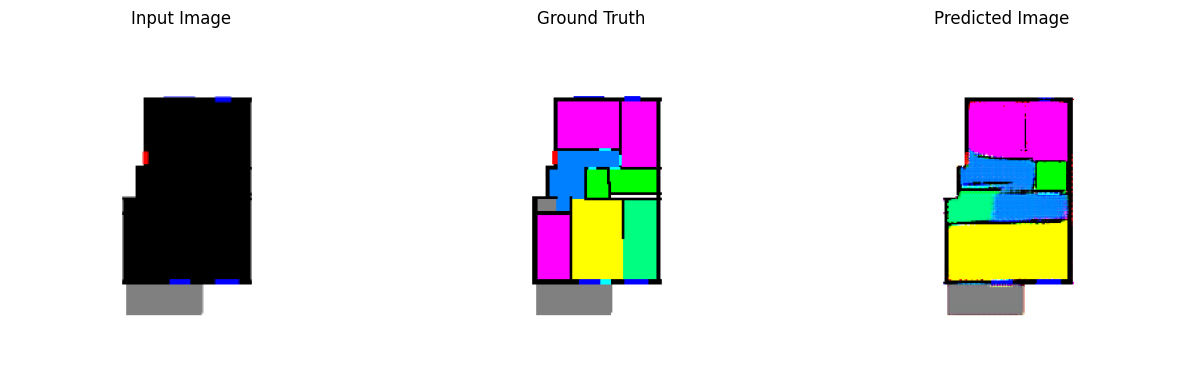

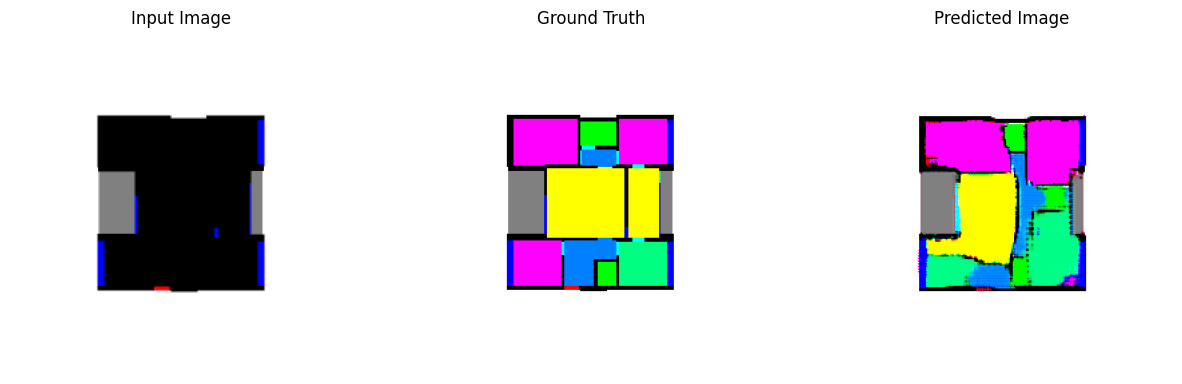

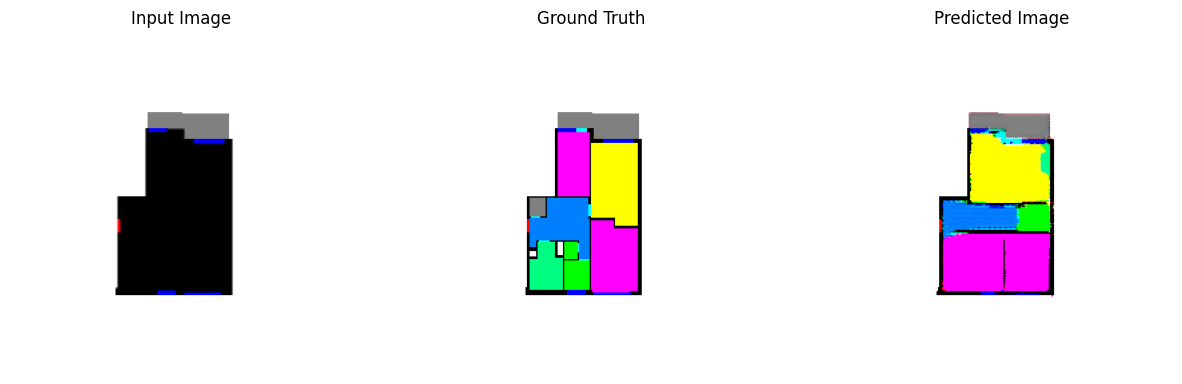

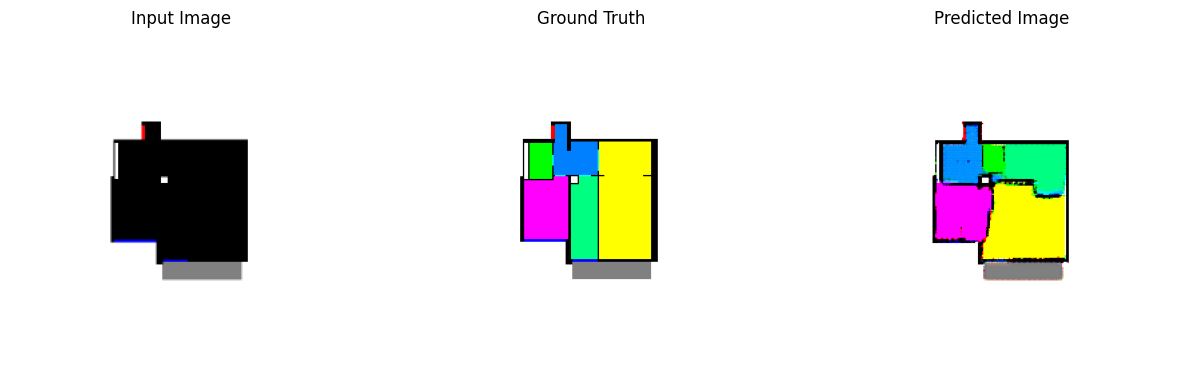

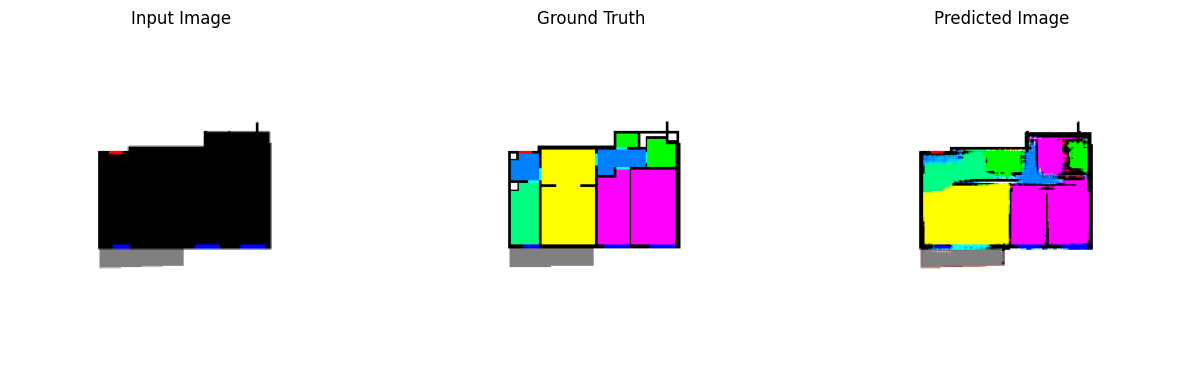

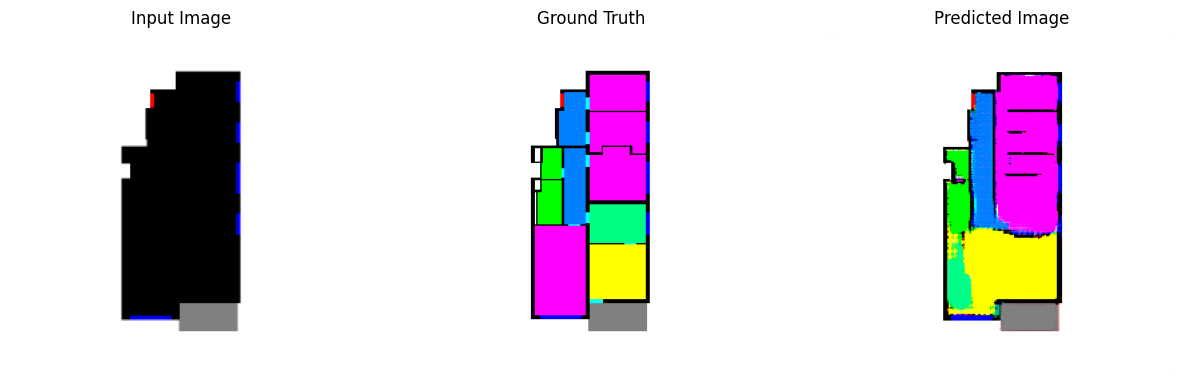

In [203]:
checkpoint.restore( checkpoint_dir + "/ckpt-20")

for i in range(50, 60):
  generate_images(generator, test_gen[i][0], test_gen[i][1])